# Week 5 - Extra Material
# Kernel SVMs
**Big thank you to Professor Liang Zhao for the material in this workbook**

## Motivation
- Data may not be linearly separable in their original features.

Consider the following dataset:

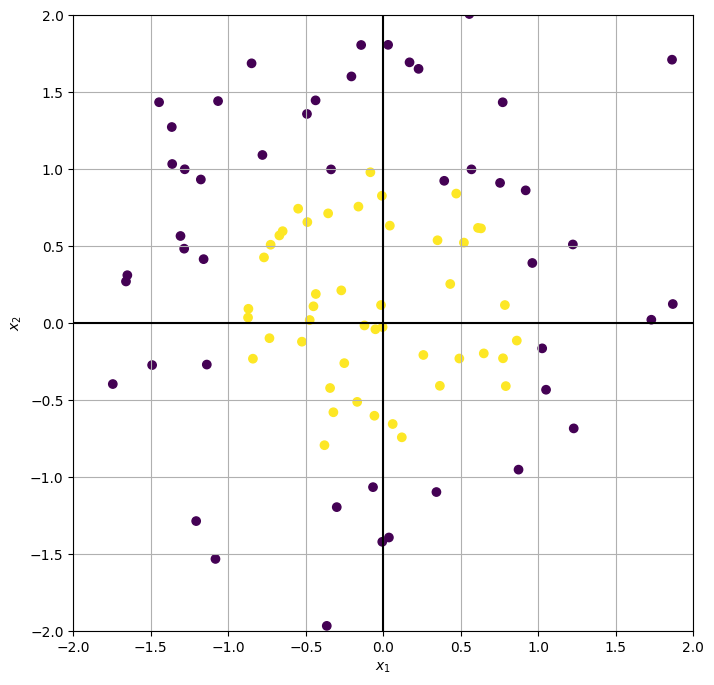

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

m = 100  # size of data set
data = pd.DataFrame(index=np.arange(m))
# input features: x1, x2
data['x1'] = np.random.randn(m)
data['x2'] = np.random.randn(m)
# target value: y
# y = 0 if (x1, x2) is inside the unit circle
# y = 1 if (x1, x2) is outside of the unit circle
data['y'] = (data['x1'] ** 2 + data['x2'] ** 2 < 1)

# plot the data
plt.figure(figsize=(8, 8))
plt.scatter(data['x1'],
            data['x2'],
            c=data['y'])
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

## SVM with Polynomial Kernel
This dataset is clearly not linear separable. Next, add two new features $x_1^2$ and $x_2^2$.

In [ ]:
# add two new features: x1 squared and x2 squared
data['x1^2'] = data['x1'] ** 2
data['x2^2'] = data['x2'] ** 2

Now plot the data with two new features

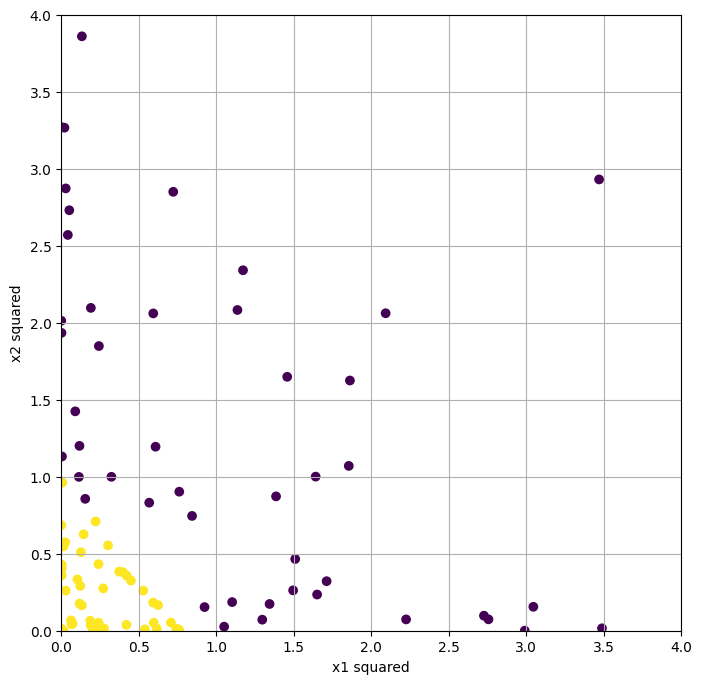

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(data['x1^2'],
            data['x2^2'],
            c=data['y'])
plt.grid(True, which='both')
plt.xlabel('x1 squared')
plt.ylabel('x2 squared')
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.show()

Under new features, the data set becomes linear separable! This means that we can apply SVM to descibe the distribution. The transformation used to generate new features is called kernel. Here we use polynomial kernel of degree 2.

In [ ]:
from sklearn.svm import SVC
model = SVC(C=10,
            kernel='poly',
            degree=2,
            coef0=0)
# The hyperparameter coef0 controls how much the
# model is influenced by high-degree polynomials
# versus low-degree polynomials
model.fit(data[['x1', 'x2']], data['y'])

SVC(C=10, coef0=0, degree=2, kernel='poly')

## <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">sklearn.svm.SVC</a>

- Parameters
- Attributes
- Methods

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


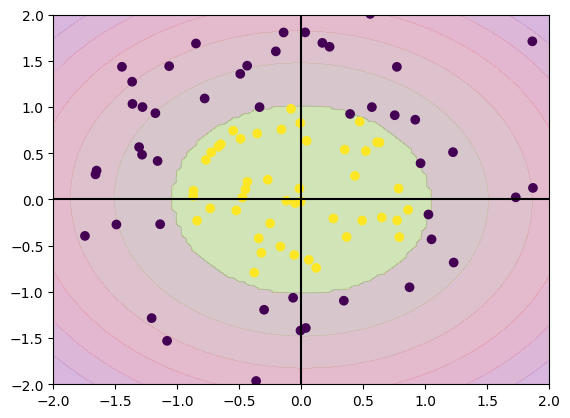

In [ ]:
# plot the decision boundary
x1s = np.linspace(-2, 2, 100)
x2s = np.linspace(-2, 2, 100)
x1, x2 = np.meshgrid(x1s, x2s)
X = np.c_[x1.reshape(-1, 1), x2.reshape(-1, 1)]
y_pred = model.predict(X).reshape(x1.shape)
plt.contourf(x1, x2, y_pred,
             cmap=plt.cm.brg,
             alpha=0.2)
y_decision = model.decision_function(X).reshape(x1.shape)
plt.contourf(x1, x2, y_decision,
             cmap=plt.cm.brg,
             alpha=0.1)
plt.scatter(data['x1'], data['x2'], c=data['y'])
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

## Nonlinear SVM: Model Formulation
- Let $\textbf{x} = (X_1, ..., X_p)^T$ be the vector of original input features.
- Let $\phi: \mathbb{R}^p \rightarrow \mathbb{R}^n$ be the function that transforms $\textbf{x}$ into $n$-dimensional vector $\phi(\textbf{x})$.
- The SVM model assumes that the decision rule is
$$\hat{Y} = sign(\textbf{w}^T\phi(\textbf{x})) $$
- Let's use the soft-margin cost function
$$J(\textbf{w}) = \frac{1}{2}(\textbf{w}^T\cdot \textbf{w}) + C
\sum_{i=1}^m\max(0, 1-y^{(i)}\textbf{w}^T\phi(\textbf{x}^{(i)}))$$

## Nonlinear SVM: Training Methods

**Primal method:** Directly solve
$$\min_\textbf{w} \big\{\frac{1}{2}(\textbf{w}^T\cdot \textbf{w}) + C
\sum_{i=1}^m\max(0, 1-y^{(i)}\phi(\textbf{x}^{(i)}))\big\}$$
- Need to calculate $\phi(\textbf{x}^{(i)})$ for all $i=1,...,m$.
- The number of parameters is equal to the number of transformed features.
- Directly minimizing the objective function is desirable if the number of new features is small.

In [ ]:
# The polynomial SVM is equivalent to linear SVM with polynomial features.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(data[['x1', 'x2']])
model = LinearSVC(C=10)
model.fit(X_poly, data['y'])
model.coef_

array([[ 2.08492046, -0.23360966,  0.14321053, -4.22757587, -0.08692302,
        -4.21627595]])

In [ ]:
data.head(3)

,x1,x2,y,x1^2,x2^2
0,0.227486,1.652397,False,0.051750,2.730416
1,0.770335,1.435405,False,0.593416,2.060387
2,-0.435345,0.190543,True,0.189525,0.036307


In [ ]:
X_poly[:3, :]

array([[ 1.        ,  0.22748554,  1.65239694,  0.05174967,  0.37589641,
         2.73041564],
       [ 1.        ,  0.77033518,  1.43540484,  0.59341629,  1.10574285,
         2.06038707],
       [ 1.        , -0.43534469,  0.19054321,  0.189525  , -0.08295197,
         0.03630672]])

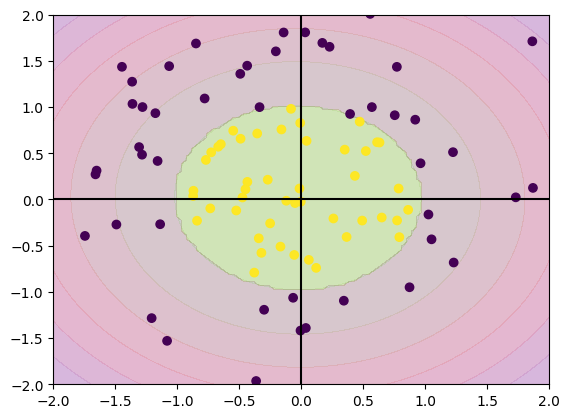

In [ ]:
# plot the decision boundary
x1s = np.linspace(-2, 2, 100)
x2s = np.linspace(-2, 2, 100)
x1, x2 = np.meshgrid(x1s, x2s)
X = np.c_[x1.reshape(-1, 1), x2.reshape(-1, 1)]
X_poly = poly.fit_transform(X)
y_pred = model.predict(X_poly).reshape(x1.shape)
plt.contourf(x1, x2, y_pred,
             cmap=plt.cm.brg,
             alpha=0.2)
y_decision = model.decision_function(X_poly).reshape(x1.shape)
plt.contourf(x1, x2, y_decision,
             cmap=plt.cm.brg,
             alpha=0.1)
plt.scatter(data['x1'], data['x2'], c=data['y'])
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

## SVM with Gaussian kernel
The drawback of polynomial kernel is that it is not clear how to set the degree and coef0 properly, especially when the number of feature is large and visualization is difficult.

Another technique to tackle nonlinear problems is to add features computed using a *similarity function* that measures how much each instance resembles a particular *landmark*. For example, consider the following 1D dataset:

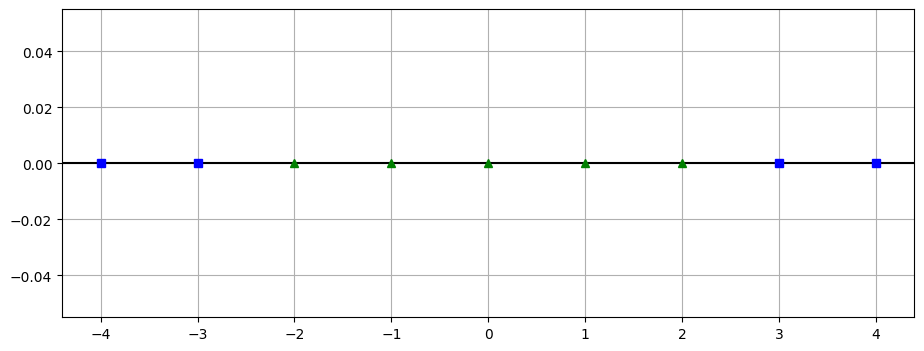

In [ ]:
X = np.linspace(-4, 4, 9).reshape(-1, 1)
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0]).reshape(-1, 1)

plt.figure(figsize=(11, 4))
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X[y==0], np.zeros(4), 'bs')
plt.plot(X[y==1], np.zeros(5), 'g^')
plt.show()

Add two **landmarks** l=-2 and l=1. For each landmark, define the *similarity function*:

$\phi(x, l) = \exp(-\gamma (x - l)^2)$.

Here $\gamma$ is a hyperparameter. This function is called the **Gaussian Radial Basis Function (RBF)**. With $\gamma=0.3$, its graph is:

In [ ]:
def GaussianRBF(x, l, gamma=0.3):
    return np.exp(-gamma * (x - l) ** 2)

print(GaussianRBF(-4, -2))
print(GaussianRBF(-1, -2))

0.30119421191220214
0.7408182206817179


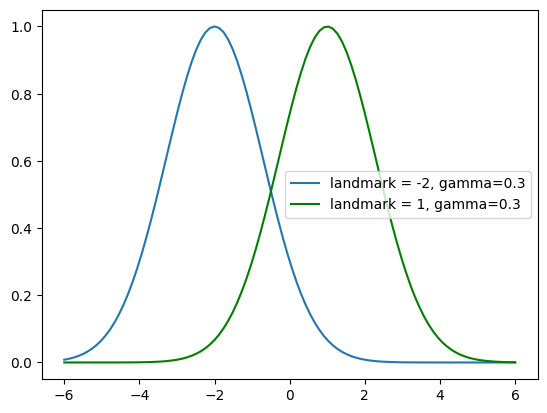

In [ ]:
# Let gamma=0.3, plot the Gaussian RBF function.
x = np.linspace(-6, 6, 100)
# print('x:')
# print(x)
y = []
# use a for loop to go through all values in x, calculate its corresponding
# y value, append to y.
for i in range(100):
    y.append(GaussianRBF(x[i], -2))

# use another landmark 1
y1 = GaussianRBF(x, 1)
# plot the x, y coordinates
import matplotlib.pyplot as plt
plt.plot(x, y, label='landmark = -2, gamma=0.3')
plt.plot(x, y1, 'g', label='landmark = 1, gamma=0.3')

# # plot the curve with landmark=-2 and gamma = 1
# y2 = GaussianRBF(x, -2, gamma=1)
# plt.plot(x, y2, 'k', label='landmark = -2, gamma=1')

plt.legend()
plt.show()

For landmarks l1=-2 and l2=1, evaluate its similarity function at each data example.

In [ ]:
similarity1 = GaussianRBF(X, -2).reshape(-1, 1)
similarity2 = GaussianRBF(X, 1).reshape(-1, 1)

print(', '.join(['%.3f' % x for x in similarity1]))
print(', '.join(['%.3f' % x for x in similarity2]))
print('shape:', similarity1.shape)

0.301, 0.741, 1.000, 0.741, 0.301, 0.067, 0.008, 0.001, 0.000
0.001, 0.008, 0.067, 0.301, 0.741, 1.000, 0.741, 0.301, 0.067
shape: (9, 1)


Visualize the similarities as a 2D scatter plot. Notice that data points become linear separable in this plot

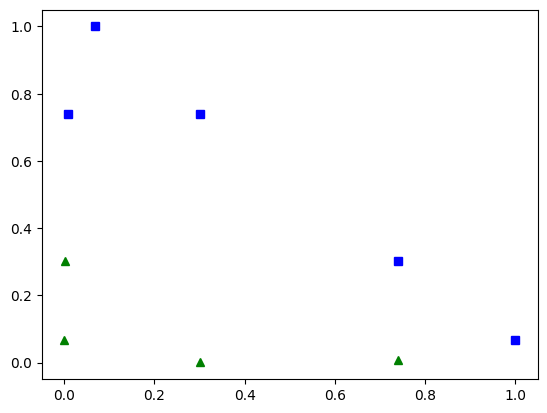

In [ ]:
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0]).reshape(-1, 1)
plt.plot(similarity1[y==0], similarity2[y==0], 'g^')
plt.plot(similarity1[y==1], similarity2[y==1], 'bs')
plt.show()

Next, let's train an SVM model using RBF kernel, where every data instance is used as a landmark.

In [ ]:
from sklearn.svm import SVC
X = np.linspace(-4, 4, 9).reshape(-1, 1)
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0]).reshape(-1, 1)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
model = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf',
                gamma=1,
                C=1))
])
model.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(C=1, gamma=1))])

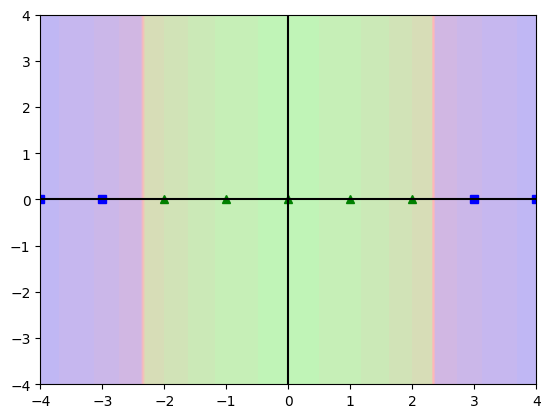

In [ ]:
# plot the decision boundary
x1s = np.linspace(-4, 4, 100)
x2s = np.linspace(-4, 4, 100)
x1, x2 = np.meshgrid(x1s, x2s)
X_plot = x1.reshape(-1, 1)
y_pred = model.predict(X_plot).reshape(x1.shape)
y_decision = model.decision_function(X_plot).reshape(x1.shape)
plt.contourf(x1, x2, y_pred,
             cmap=plt.cm.brg,
             alpha=0.2)
plt.contourf(x1, x2, y_decision,
             cmap=plt.cm.brg,
             alpha=0.1)
plt.plot(X[y==0], np.zeros(4), 'bs')
plt.plot(X[y==1], np.zeros(5), 'g^')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

## Choice of kernels
Consider a dataset with $m$ examples, each having $n$ features.
1. If $m < n$, then it is advised to use no kernel (sometimes called *linear kernel*) to avoid overfitting.
2. If $m$ is slightly larger than $n$, use a kernel (Gaussian RBF kernel is generally better than polynomial kernel in practice)
3. If $m$ is extremely large, it is usually a good idea to create new features.

Other choices of kernels:
- sigmoid kernel (equivalent to logistic regression)
- string kernel (for text data)
- define new kernels

## The Kernel Trick

Adding extra features may dramatically increase the computational complexity. For example, consider a polynomial kernel with degree 3 and set coef0 = 1. This means to transform each input feature x as:

$(x+1)^3 = x^3 + 3x^2 + 3x + 1$,

and two new features 'x^3', 'x^2' are added to the model. If the dataset is very complex and a large degree is needed, the model will create a huge number of features, making the model too slow.

Fortunately, when using SVMs you can apply an almost miraculous mathematical technique called the *kernel trick*, which makes it possible to handle extra features without actually having to add them. As a result, the exponential explosion of complexity is avoided since new features are not actually added.

## Extra Somewhat Related to Assignment 2: ColumnTransformer and Pipelines

In [ ]:
# An example of columntransformer and pipeline
import numpy as np
import pandas as pd

data = pd.DataFrame(data={'GPA': [4.0, 3.5, 3.7],
                          'Internship': ['Y', 'N', 'N'],
                          'Recruit': [1, 0, 1]})
data

,GPA,Internship,Recruit
0,4.0,Y,1
1,3.5,N,0
2,3.7,N,1


In [ ]:
# First, one-hot encode 'internship'
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
X = encoder.fit_transform(data[['Internship']])
data['Intern_num'] = X.toarray()[:,1]

In [ ]:
# Perform standard scaling to 'GPA'
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['GPA_scaled'] = scaler.fit_transform(data[['GPA']])
data

,GPA,Internship,Recruit,Intern_num,GPA_scaled
0,4.0,Y,1,1.0,1.297771
1,3.5,N,0,0.0,-1.135550
2,3.7,N,1,0.0,-0.162221


In [ ]:
# combine the two actions using column transformer
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer([
    ('GPA', StandardScaler(), [0]),
    ('Intern', OneHotEncoder(), [1])
])
X_transformed = transformer.fit_transform(data.values)

In [ ]:
# Build a logistic regression to predict 'recruit'
from sklearn.linear_model import LogisticRegression

y = data['Recruit']
model = LogisticRegression(solver='lbfgs')
model.fit(X_transformed, y)

LogisticRegression()

In [ ]:
model.coef_

array([[ 0.67207979, -0.13501984,  0.13501401]])

In [ ]:
# Use pipeline to combine transformation and model construction.
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('transformer', transformer),
    ('model', LogisticRegression(solver='lbfgs'))
])
pipeline.fit(data.values, y)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('GPA', StandardScaler(), [0]),
                                                 ('Intern', OneHotEncoder(),
                                                  [1])])),
                ('model', LogisticRegression())])

In [ ]:
# The coefficents are identical to the previous logistic model.
pipeline['model'].coef_

array([[ 0.67207979, -0.13501984,  0.13501401]])